In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.spatial.distance import cdist

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

import hypertools as hyp
from collections import Counter

'''Set plotting parameters'''
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

2023-03-16 22:08:09.203018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
customers = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

Column description:

- ID: Customer’s unique identifier
- Year_Birth: Customer's birth year
- Education: Education Qualification of customer
- Marital_Status: Marital Status of customer
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- MntWines: Amount spent on wine
- MntFruits: Amount spent on fruits
- MntMeatProducts: Amount spent on meat products
- MntFishProducts: Amount spent on fish products
- MntSweetProducts: Amount spent on sweet products
- MntGoldProds: Amount spent on gold products
- NumDealsPurchases: Number of deal purchases
- NumWebPurchases: Number of web purchases
- NumCatalogPurchases: Number of catalog purchases
- NumStorePurchases: Number of store purchases
- NumWebVisitsMonth: Number of web visits of the month
- AcceptedCmp3/AcceptedCmp4/AcceptedCmp5/AcceptedCmp1/AcceptedCmp2/Response: Promotion
- Complain
- Z_CostContact
- Z_Revenue


In [3]:
customers.shape

(2240, 28)

In [4]:
customers.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
customers.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null 

In [7]:
# We choose to keep a copy of the initial dataset for safety.
df = customers.copy()
# So on, we are going to work with df dataset

# Data cleaning

In [8]:
# Converting Dt_Customer into DateTime dType.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [9]:
# The column 'Income' includes a small ammount of Nuns. Let's drop them.
df.dropna(inplace=True)

The column Dt_Customer (Date of customer's enrollment with the company) informs us about for how long the customer prefers the company's services.
So, we decided to create a new column that contains a clearer information about that:

In [10]:
# NumDaysInCompany : For how long (in days) the customer is enrolled in the company?
# We suppose as benchmark the most recent date of out data. 
df['NumDaysInCompany'] = df['Dt_Customer'].apply(lambda x: (df['Dt_Customer'].max()-x).days)

In [11]:
# We can also extract a column (Age) given the column 'Year_Birth'. We suppose as current the year of the last enrollment. 
df['Age'] = df['Dt_Customer'].max().year - df['Year_Birth']

In [12]:
# Drop the Dt_Customer column as NumDaysInCompany column gives the information needed.
df.drop('Dt_Customer', axis=1,inplace=True)

In [13]:
# Drop the Year_Birth column as Age column gives the information needed.
df.drop('Year_Birth', axis=1,inplace=True)

Now, let's deal with the object-type data. The columns 'Education' and 'Marital_Status' needs to be converted into numerical data:

In [14]:
df = pd.get_dummies(df)

How does the dataset look like now?

In [15]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumDaysInCompany,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,0,1,0,0,0,0,0,0,1,0,0,0
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,0,1,0,0,0,0,0,0,1,0,0,0
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,0,1,0,0,0,0,0,0,0,1,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,0,1,0,0,0,0,0,0,0,1,0,0
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,0,0,0,1,0,0,0,1,0,0,0,0


In [16]:
# describe data
print("--------------------------")
print("Describe:-----------------")
print(df.describe())
print("--------------------------")
print("Shape:--------------------")
print(df.shape)
print("--------------------------")
print("Is.Na---------------------")
print(df.isna().sum())
print("--------------------------")
print("Info----------------------")
print(df.info(verbose=True))

--------------------------
Describe:-----------------
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2216.000000      2216.000000      2216.000000       2216.000000   
mean     26.356047       166.995939        37.637635         27.028881   
std      39.793917       224.283273    

# Data Visualization

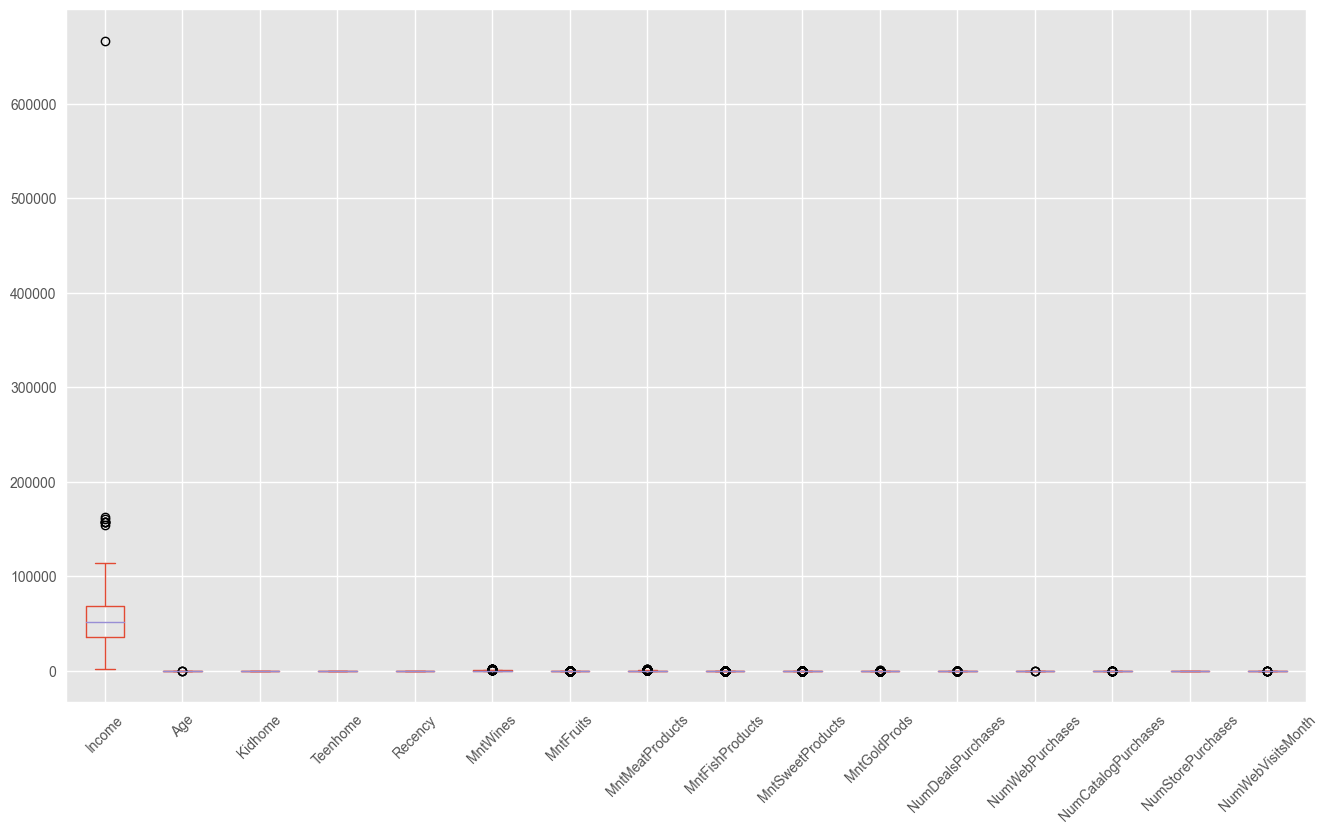

In [17]:
# Boxplot
df[['Income','Age','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].plot(kind='box', rot = 45)
None

We have a significant outlier (Income = 666.666). It' about one row, so let't drop it.

In [18]:
df.drop(df[df['Income']== df['Income'].max()].index,axis=0,inplace=True)

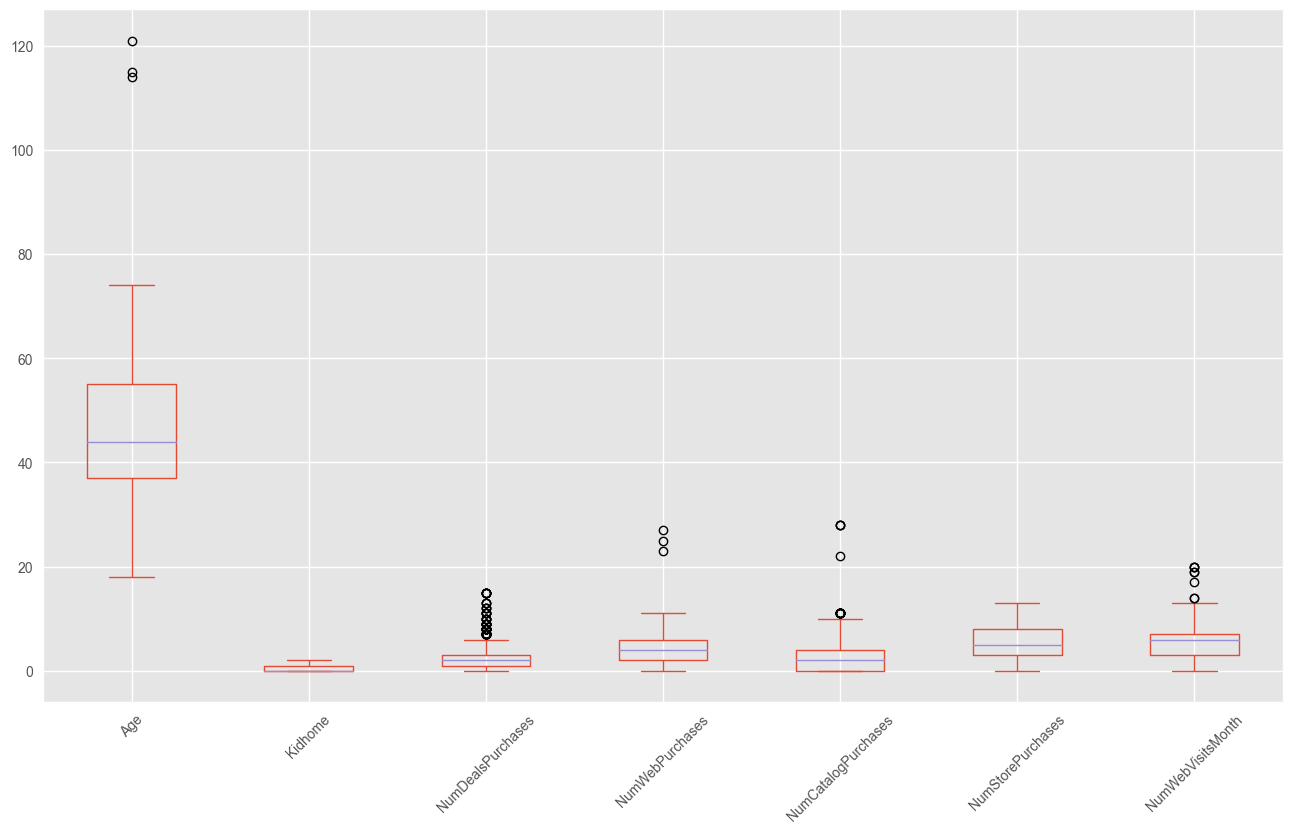

In [19]:
# Boxplot
df[['Age','Kidhome','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']].plot(kind='box', rot = 45)
None

It seems like our dataset includes customers that are probably not alive nowadays. So:

In [20]:
df.drop(df[df['Age'] > 100].index,axis=0,inplace=True)

#### Correlation Heatmap

In [21]:
# Creating a new df which includes the numeric columns we need to examine correlation for.
df_corr = df[['Income','Age','NumDaysInCompany','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']]

Text(0.5, 1.0, 'Correlation Heatmap')

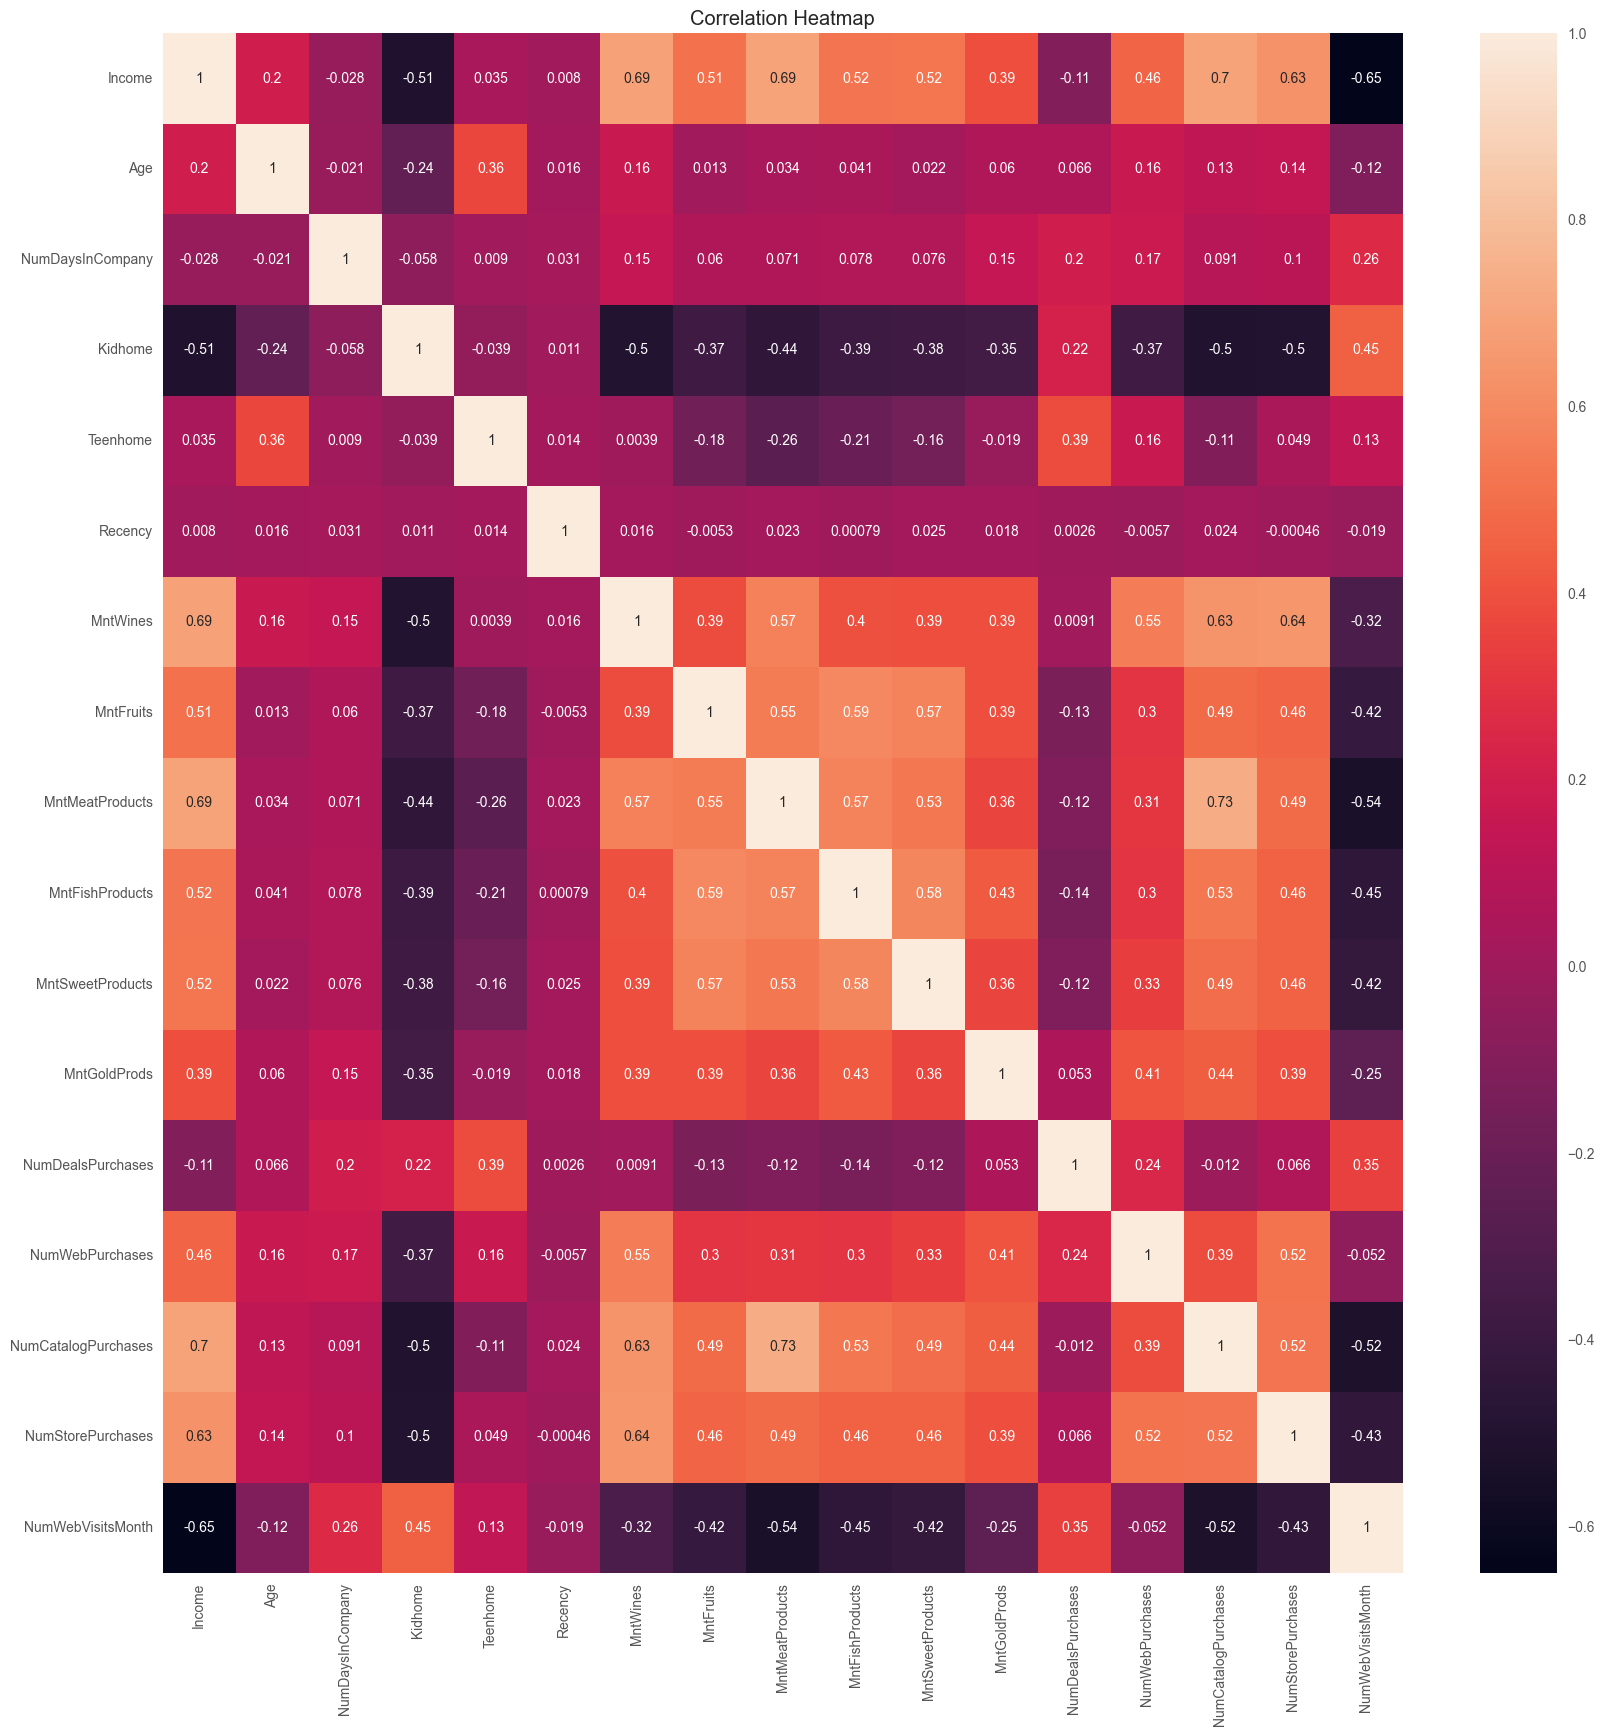

In [22]:
corr = df_corr.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True)
plt.title('Correlation Heatmap')

There are no high (> 85% or < -85%) correlations between features.

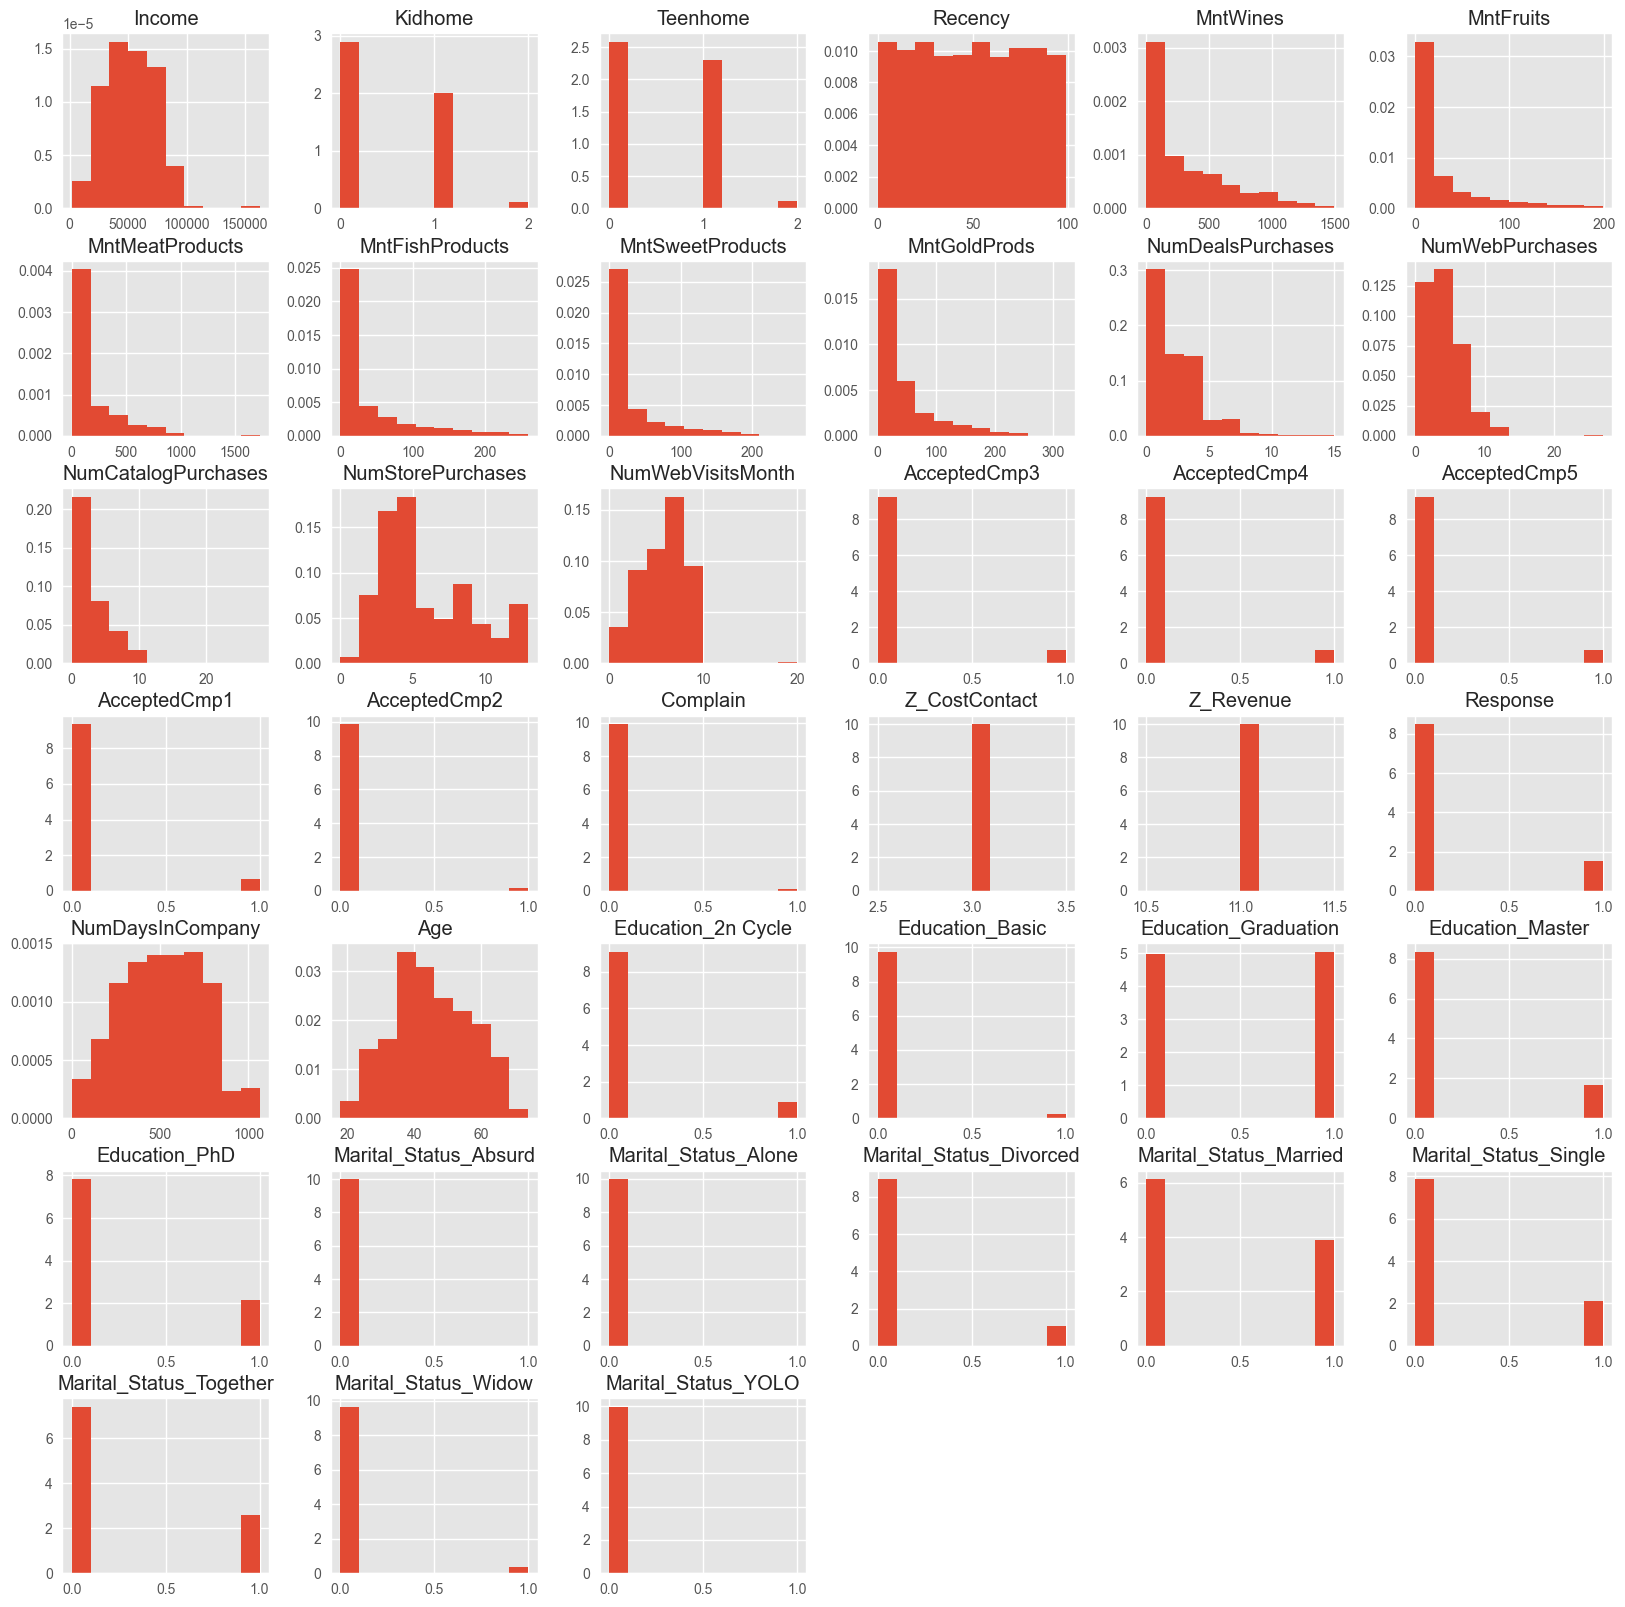

In [23]:
# Histograms
# Distribution of the features.
hs1 = df.hist(figsize=(20,20), density=True)

plt.show()

# Data Scaling

In [24]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumDaysInCompany,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,0,1,0,0,0,0,0,0,1,0,0,0
2174,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,0,1,0,0,0,0,0,0,1,0,0,0
4141,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,0,1,0,0,0,0,0,0,0,1,0,0
6182,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,0,1,0,0,0,0,0,0,0,1,0,0
5324,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,0,0,0,1,0,0,0,1,0,0,0,0


In [25]:
df['Response'].unique()

array([1, 0])

In [26]:
# numeric columns of our data
df_numeric = df[['Income','Kidhome','Teenhome','Recency','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','NumDaysInCompany','Age' ,'Z_CostContact','Z_Revenue' ]]

In [27]:
# Scaling numeric columns only
ss = StandardScaler()

ss.fit(df)

X = ss.transform(df)

In [28]:
X

array([[ 0.28710487, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [-0.26088203,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.9131964 , -0.82275354, -0.92969866, ...,  1.69525969,
        -0.18862801, -0.03008284],
       ...,
       [ 0.23334696, -0.82275354, -0.92969866, ..., -0.58988012,
        -0.18862801, -0.03008284],
       [ 0.80317156, -0.82275354,  0.90809708, ...,  1.69525969,
        -0.18862801, -0.03008284],
       [ 0.04229031,  1.04002111,  0.90809708, ..., -0.58988012,
        -0.18862801, -0.03008284]])

# Dimentionality reduction with Principal Component Analysis (PCA)

Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

The first two PCs of PCA method includes the biggest info percentage of all features. Plotting these two PCs we can extract information about the number of clusters.

In [29]:
pca = PCA()

In [30]:
X1 = pca.fit_transform(X)

In [31]:
X1

array([[ 3.83553858e+00, -6.34376485e-01, -4.78557498e-01, ...,
        -9.02788346e-17, -1.35023398e-16, -5.54259923e-17],
       [-2.36599578e+00, -5.97329145e-01, -2.77414934e-01, ...,
        -1.47659572e-15,  1.26788396e-17,  3.58991429e-16],
       [ 1.70059486e+00, -3.57751851e-01, -1.37412934e+00, ...,
         3.60617503e-16,  8.07057178e-16, -1.81162626e-16],
       ...,
       [ 1.48408262e+00,  8.36272772e-03,  5.85782988e-01, ...,
         7.10417719e-16, -9.41679395e-17, -6.38880231e-17],
       [ 1.74399057e+00,  1.30422681e+00, -1.02268075e+00, ...,
         7.65381164e-18,  3.17683354e-18, -1.53373838e-17],
       [-1.60521129e+00,  1.85534114e+00,  1.34878759e+00, ...,
        -2.23108699e-16,  1.17269787e-17, -1.09911679e-17]])

In [32]:
# PC1 and PC2 include the highest feature importance .
print(pca.explained_variance_ratio_)

[1.82963812e-01 6.08978306e-02 5.34301948e-02 4.74953552e-02
 4.11187923e-02 4.07121325e-02 3.62480529e-02 3.33701895e-02
 3.28976898e-02 3.11217950e-02 2.96562715e-02 2.87372084e-02
 2.82230508e-02 2.76122521e-02 2.73898258e-02 2.62004151e-02
 2.57074050e-02 2.53485498e-02 2.20190620e-02 2.11836184e-02
 1.95827482e-02 1.79776079e-02 1.61600088e-02 1.54610590e-02
 1.51286348e-02 1.38647296e-02 1.32509716e-02 1.14268363e-02
 1.10159639e-02 1.02679890e-02 9.86225663e-03 7.66154868e-03
 6.27110677e-03 5.43855314e-03 4.29648255e-03 3.60832495e-32
 3.10713453e-33 1.12359963e-33 1.12359963e-33]


In [33]:
# We create a dataframe with PC1 ,PC2 and PC3 
new1 = pd.DataFrame(X1)
PCA_df = new1[[0,1,2]]
PCA_df.rename(columns={0:'PC1', 1:'PC2',2:'PC3'}, inplace=True)

In [34]:
PCA_df

,PC1,PC2,PC3
0,3.835539,-0.634376,-0.478557
1,-2.365996,-0.597329,-0.277415
2,1.700595,-0.357752,-1.374129
3,-2.614030,-1.710539,-0.070559
4,-0.464304,0.200952,-0.088287
...,...,...,...
2207,2.408725,0.615011,-2.013643
2208,-0.934973,2.951711,1.233796
2209,1.484083,0.008363,0.585783
2210,1.743991,1.304227,-1.022681


## Let's see the correlation between PCs and df's features. The first PC should be high correlated with the features.

In [35]:
# Reset index for new_ df so we can concat it to our df.
PCA_df.reset_index(inplace=True)
PCA_df.drop('index', axis=1, inplace=True)

In [36]:
# Reset index to df and drop the previous index, so we can concat it to new_ df. (We created a new df1 to keep df clear)
df1 = df_numeric.reset_index() 
df1.drop('ID', axis=1, inplace=True)

In [37]:
PCA_df.isnull().sum().sum()

0

In [38]:
df1.isnull().sum().sum()

0

Both new_ df and df1 have no Null values

In [39]:
# df1,new_ concat
dfcon = pd.concat([df1,PCA_df], axis=1)
dfcon

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,NumDaysInCompany,Age,Z_CostContact,Z_Revenue,PC1,PC2,PC3
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,971,57,3,11,3.835539,-0.634376,-0.478557
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,125,60,3,11,-2.365996,-0.597329,-0.277415
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,472,49,3,11,1.700595,-0.357752,-1.374129
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,65,30,3,11,-2.614030,-1.710539,-0.070559
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,321,33,3,11,-0.464304,0.200952,-0.088287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,541,47,3,11,2.408725,0.615011,-2.013643
2208,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,61,68,3,11,-0.934973,2.951711,1.233796
2209,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,315,33,3,11,1.484083,0.008363,0.585783
2210,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,316,58,3,11,1.743991,1.304227,-1.022681


<AxesSubplot: >

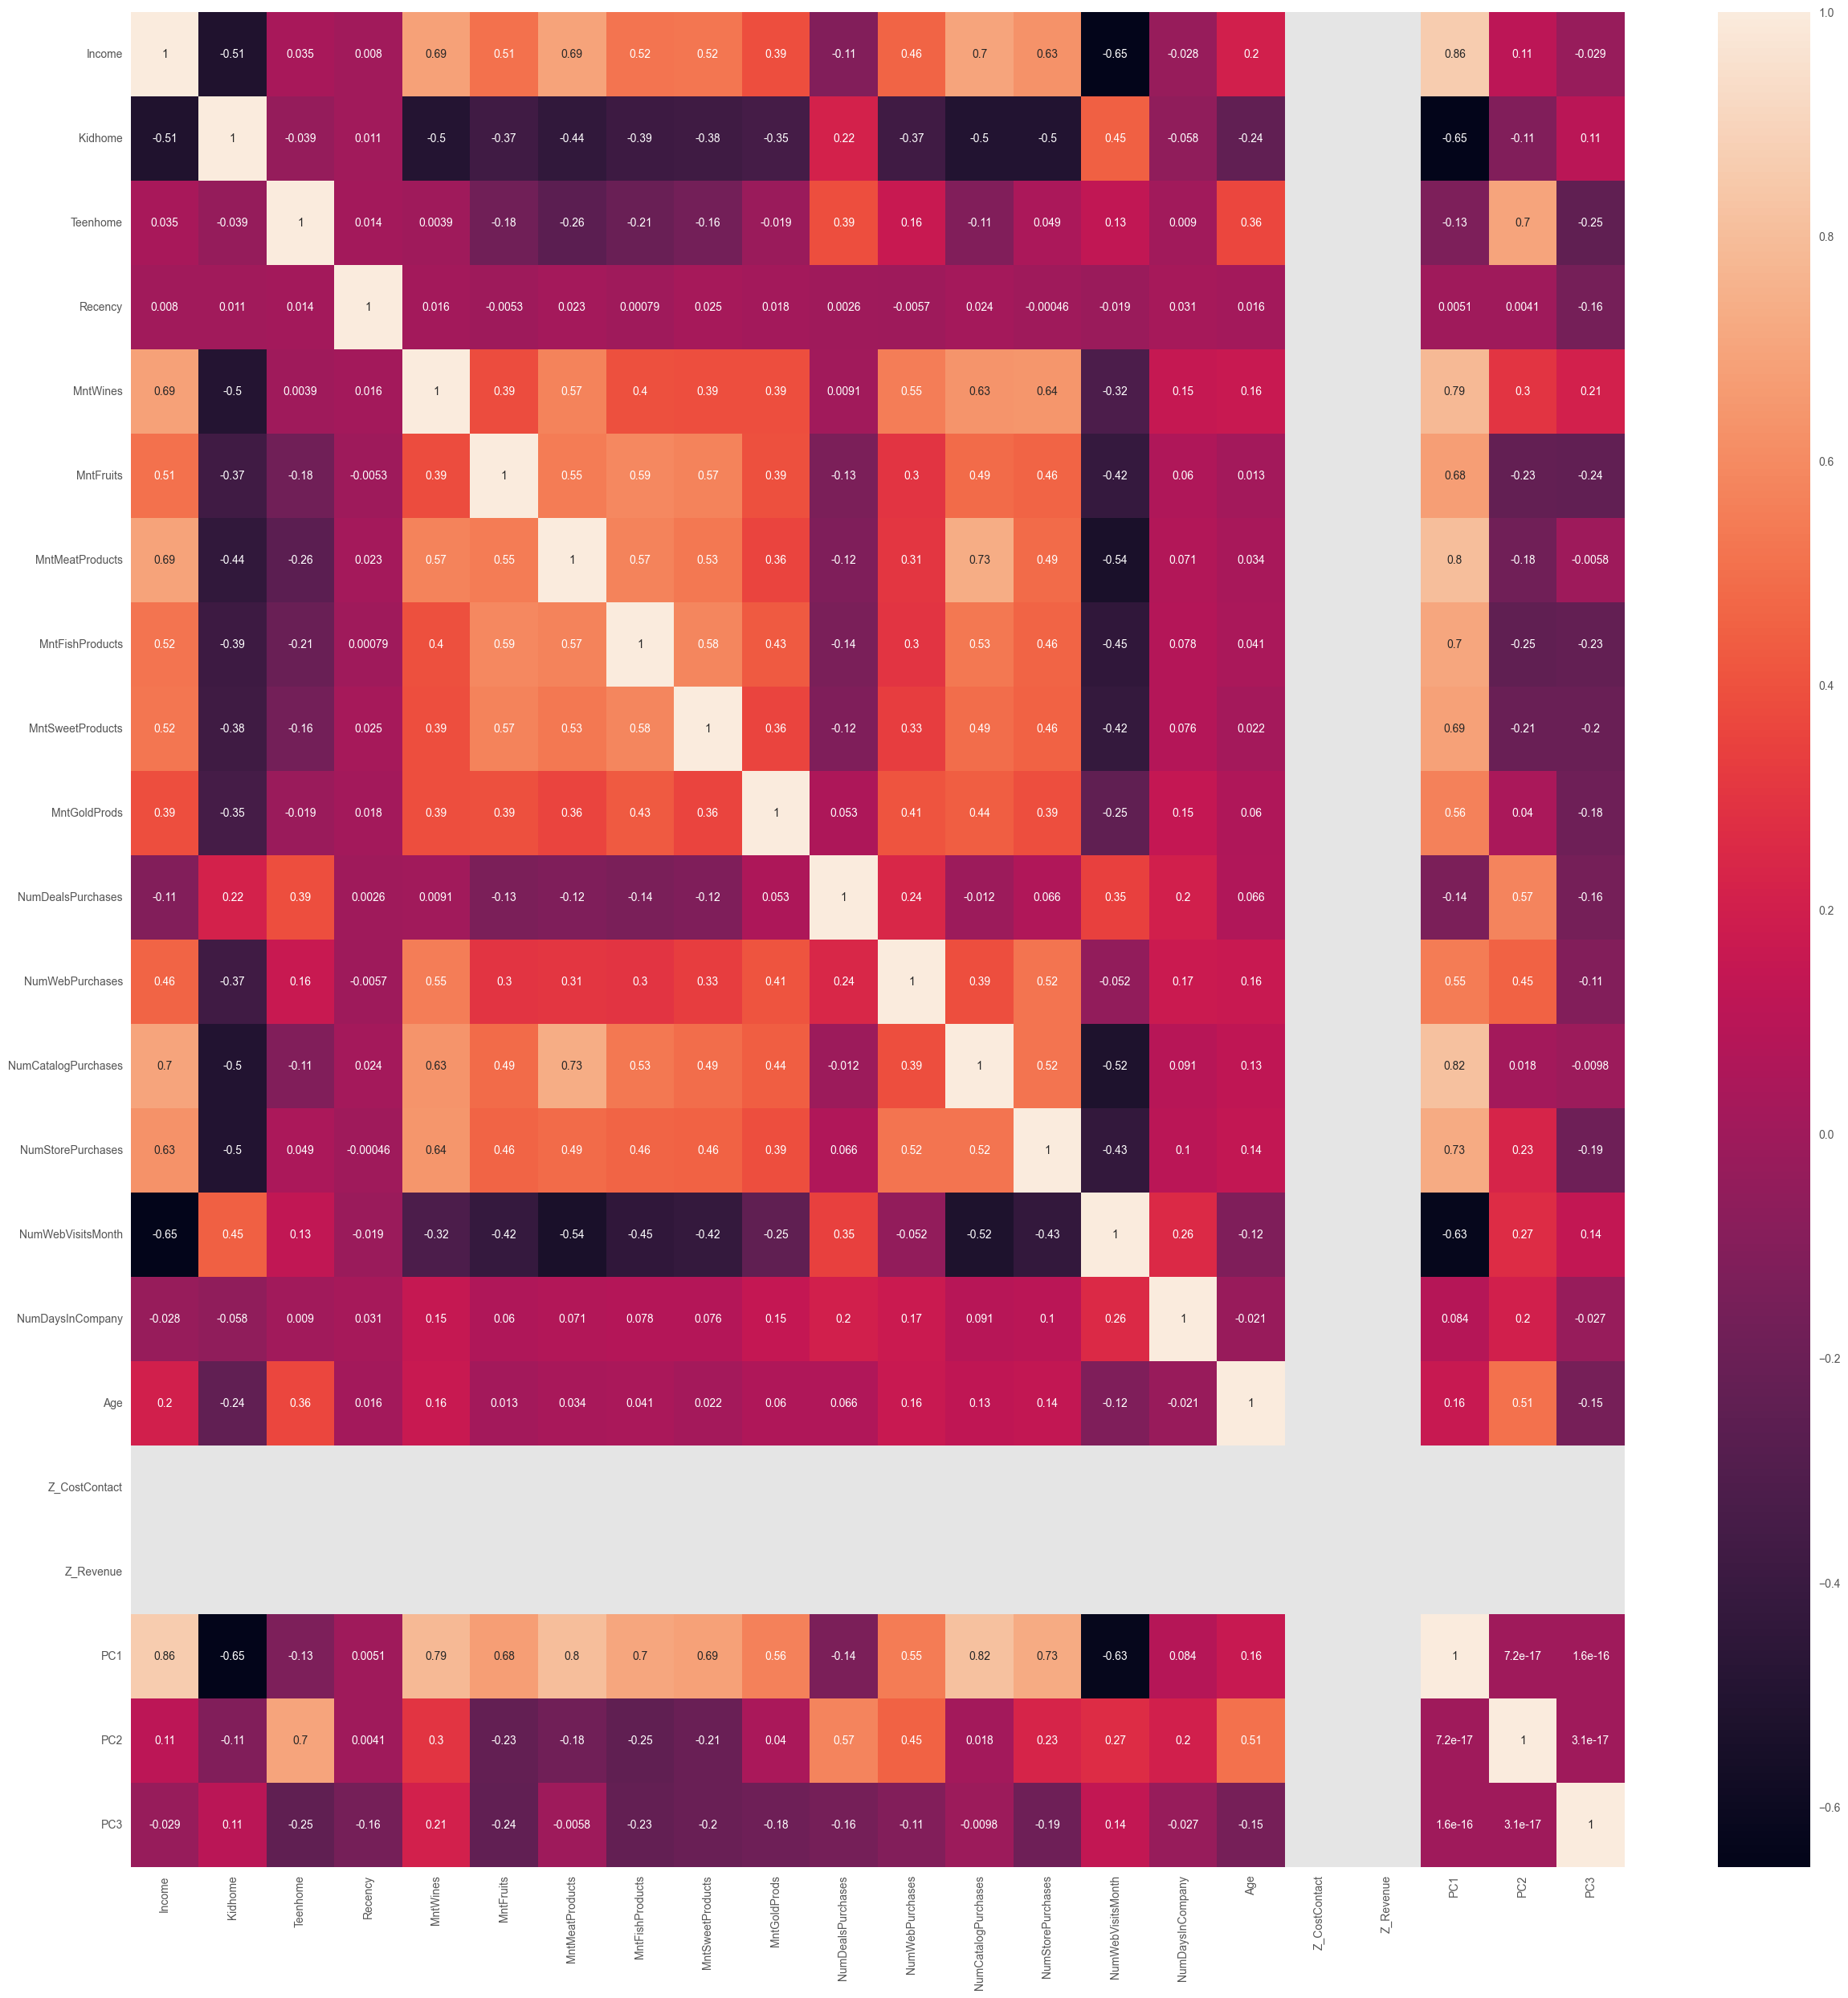

In [40]:
plt.figure(figsize=(30,30))
sns.heatmap(dfcon.corr(),annot = True, color = 'purple')

##### PC1 has higher correlation with the dataset's features. PC2 and PC3 following.

<Figure size 2000x1000 with 0 Axes>

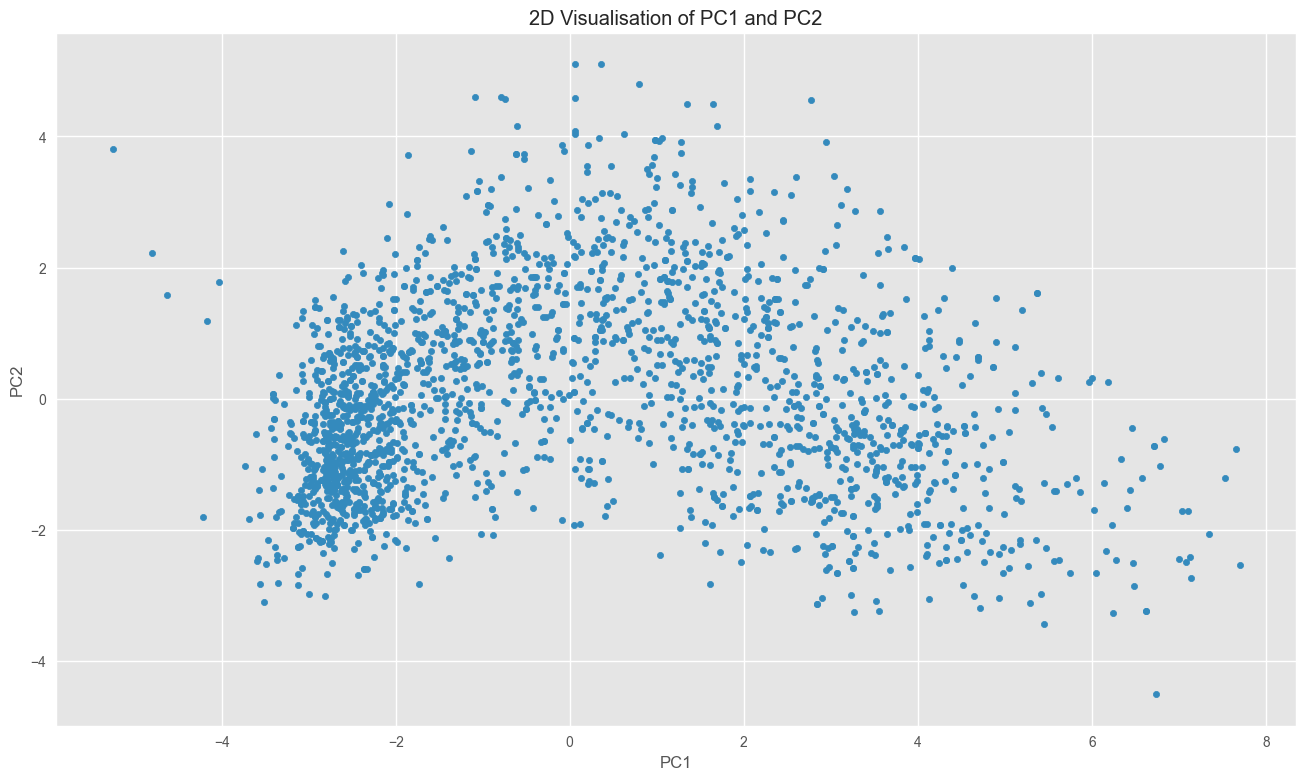

In [41]:
# Visualization of PC1 and PC2
fig = plt.figure(figsize=(20,10))
ax = PCA_df.plot.scatter(x = 'PC1', y='PC2')
ax.set_title("2D Visualisation of PC1 and PC2")
plt.show()


This plot does not gives us a clear info about the clusters. Maybe, there are two or three clusters. Let's add PC3 on the visualization for better results.

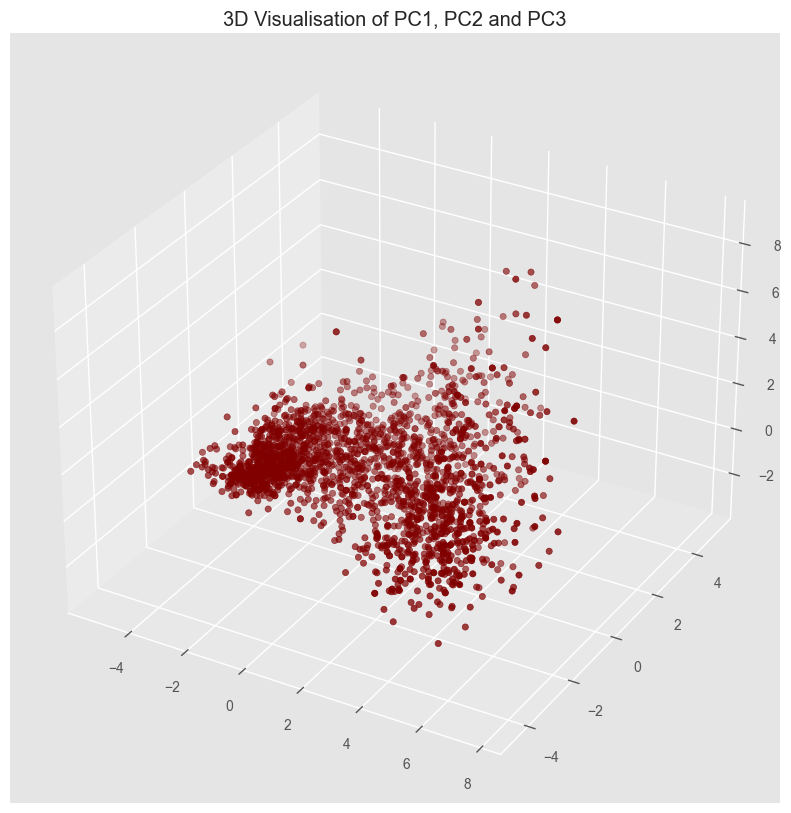

In [42]:

x =PCA_df["PC1"]
y =PCA_df["PC2"]
z =PCA_df["PC3"]

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection="3d")
# "111" means "1x1 grid, first subplot" 
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("3D Visualisation of PC1, PC2 and PC3")
plt.show()

##### We can guess that the number of clusters should be two or three. Let's perform clustering methods to extract the information needed.

# Clustering

## Hierarchical clustering - Scipy linkage()

In [43]:
# generate the linkage matrix
Z = linkage(PCA_df, method = 'ward')
# method='ward' uses the Ward variance minimization algorithm.

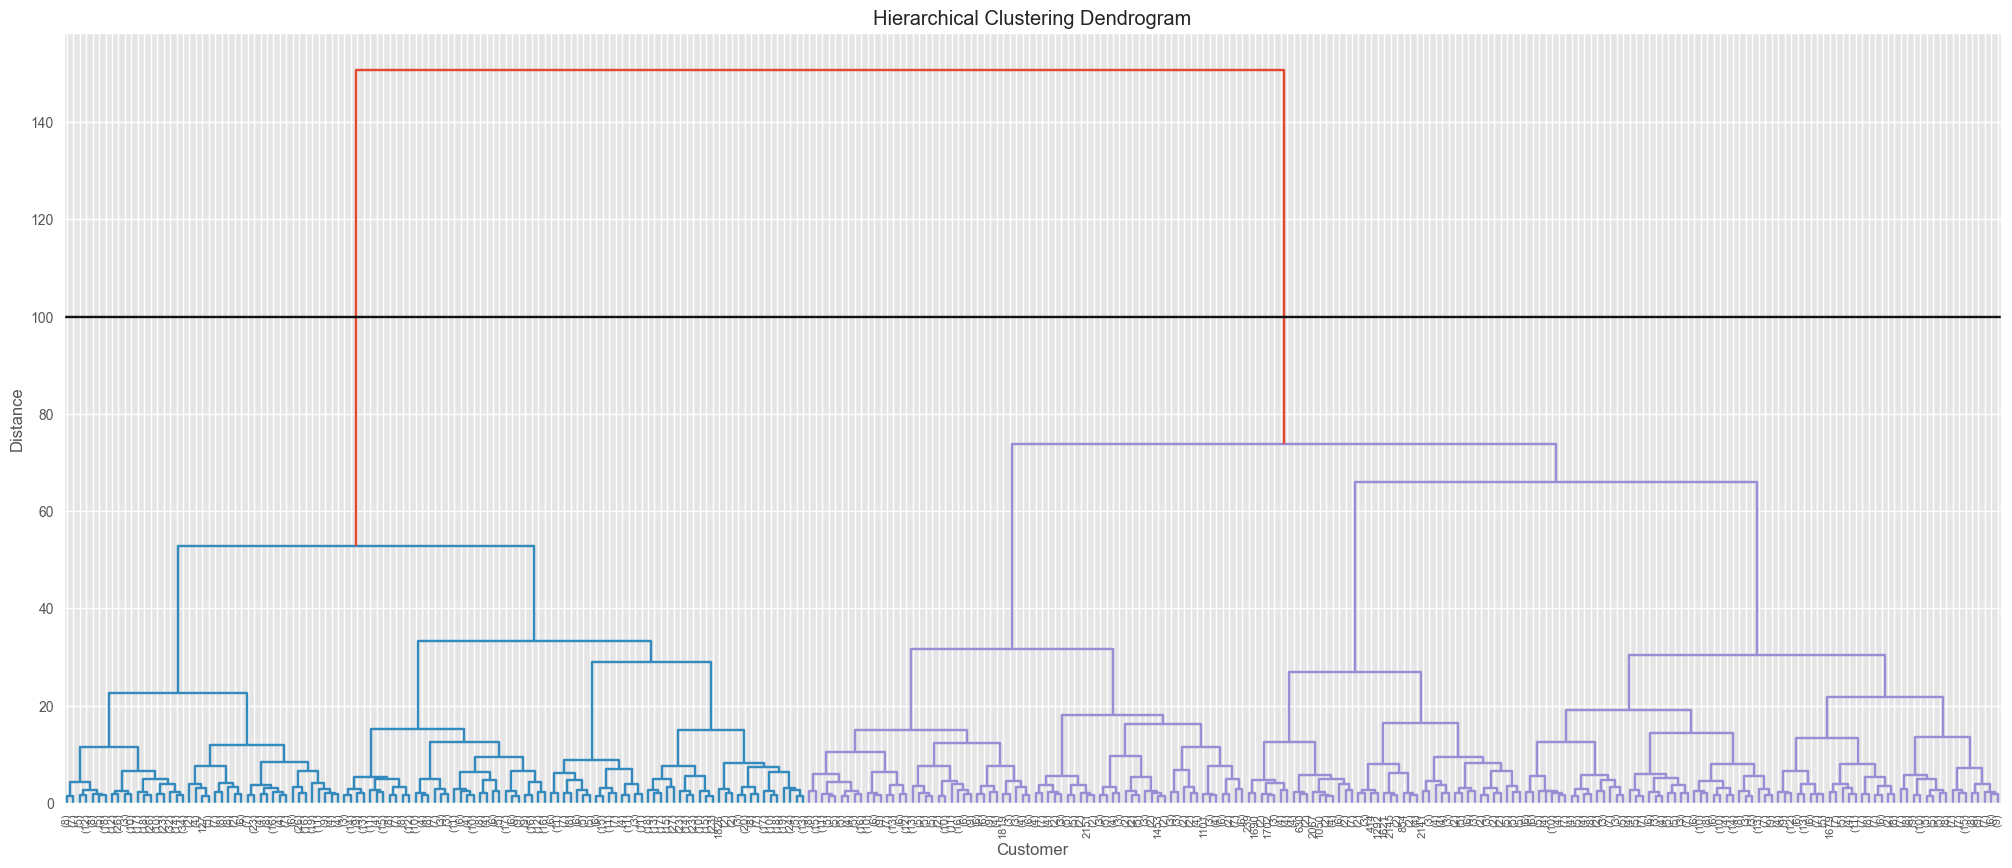

In [44]:
# set cut-off
max_d = 100

# plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=300,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

We cut where the distances are maximum.
- max_d = 100 --> two clusters

## Hierarchical clustering - Sklearn agglomerative()

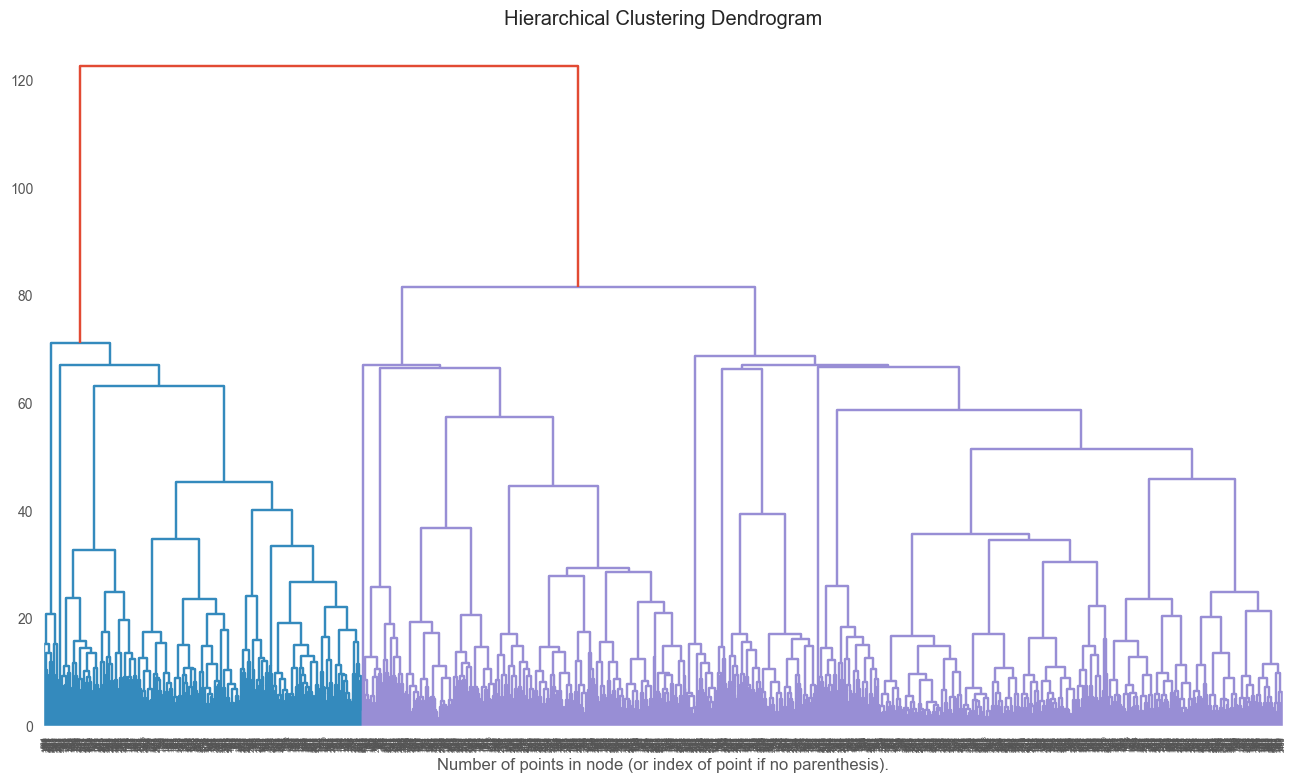

In [45]:
# Create Dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=100)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# K-means, optimal k with elbow method

In [46]:
# Prescaled data

# k : the number of possible clusters
k = range(1,10)
# list of kmeans results 
kmeans = [KMeans(n_clusters=i) for i in k]
# list of every kmean score
score = [kmeans[k].fit(df).score(df) for k in range(len(kmeans))]

In [47]:
# Scaled data

# k : the number of possible clusters
k = range(1,10)
# list of kmeans results 
kmeans = [KMeans(n_clusters=i) for i in k]
# list of every kmean score
score = [kmeans[k].fit(X).score(X) for k in range(len(kmeans))]

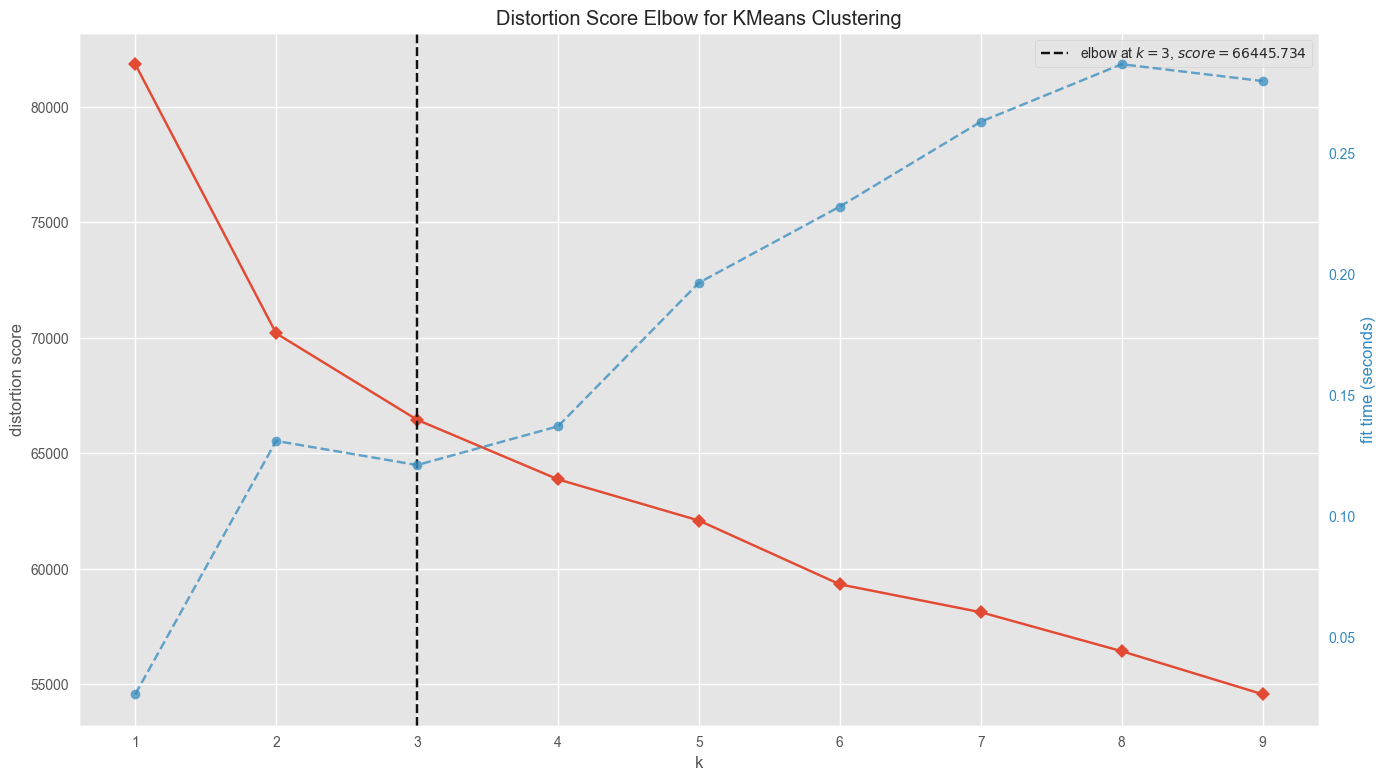

In [48]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()        # Draw/show/poof the data
plt.show()

At the iterative plot above we can see the ratio of Distortion Score for different number of clusters. We choose the k = 2 because there the ratio starts to decease in a linear way (the Elbow).

## silhouette_score

The silhouette_score gives the average value for all the samples.
This gives a perspective into the density and separation of the formed
clusters

----------------------------------------------------------------------
For n_clusters = 2 The average silhouette_score is : 0.17420061343871185


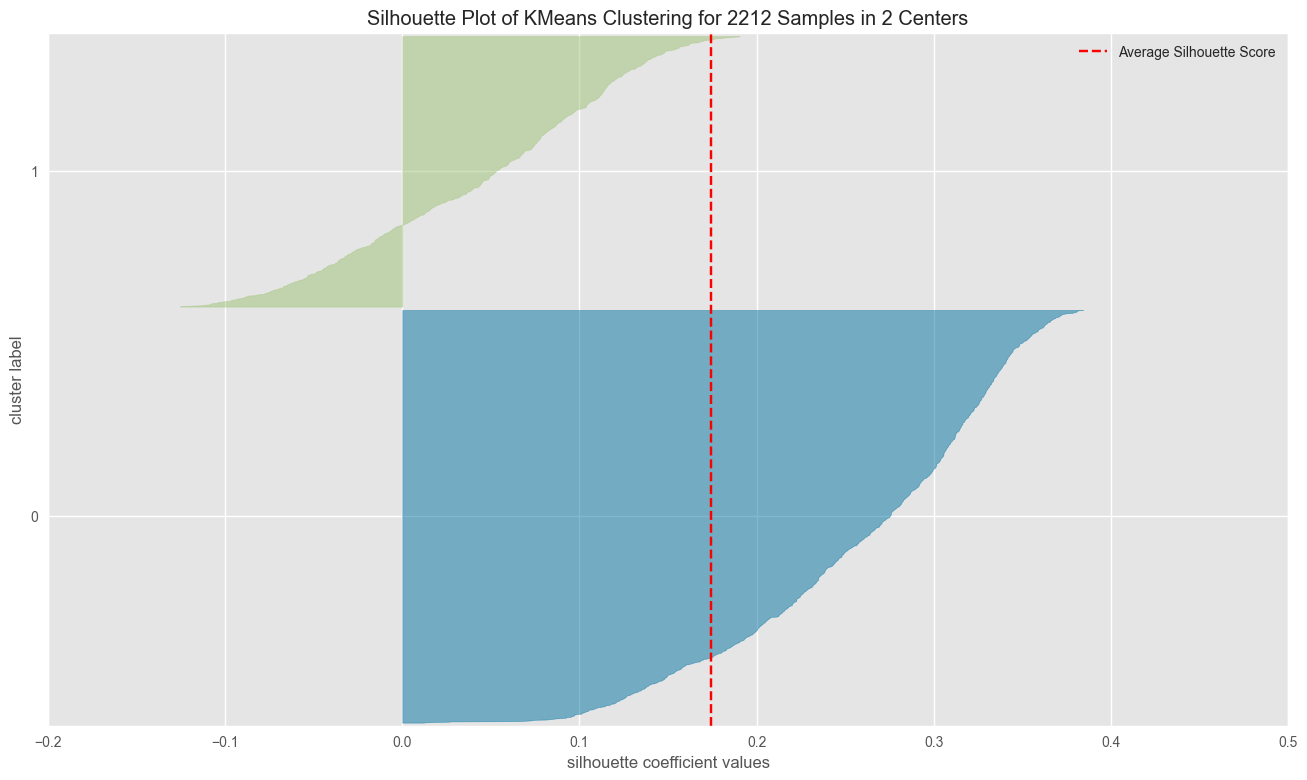

----------------------------------------------------------------------
For n_clusters = 3 The average silhouette_score is : 0.10630207618553335


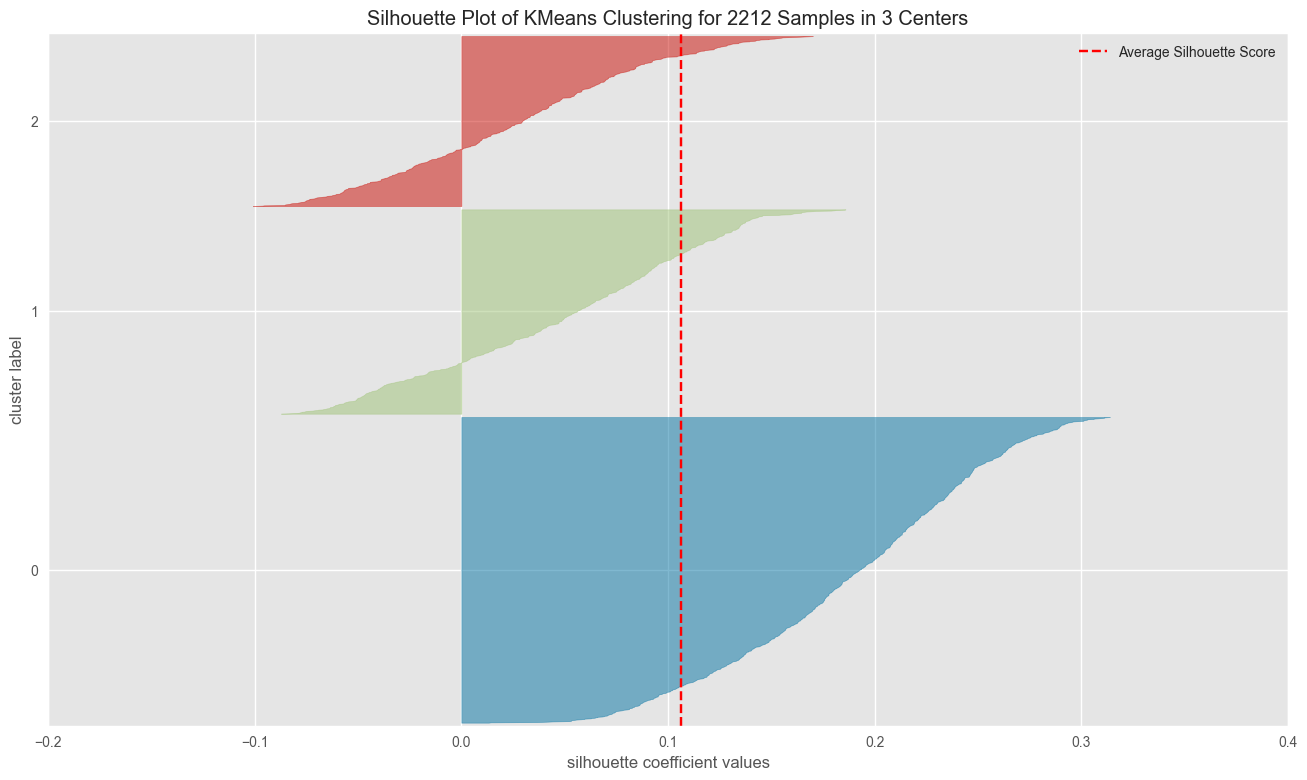

----------------------------------------------------------------------
For n_clusters = 4 The average silhouette_score is : 0.1094201125904491


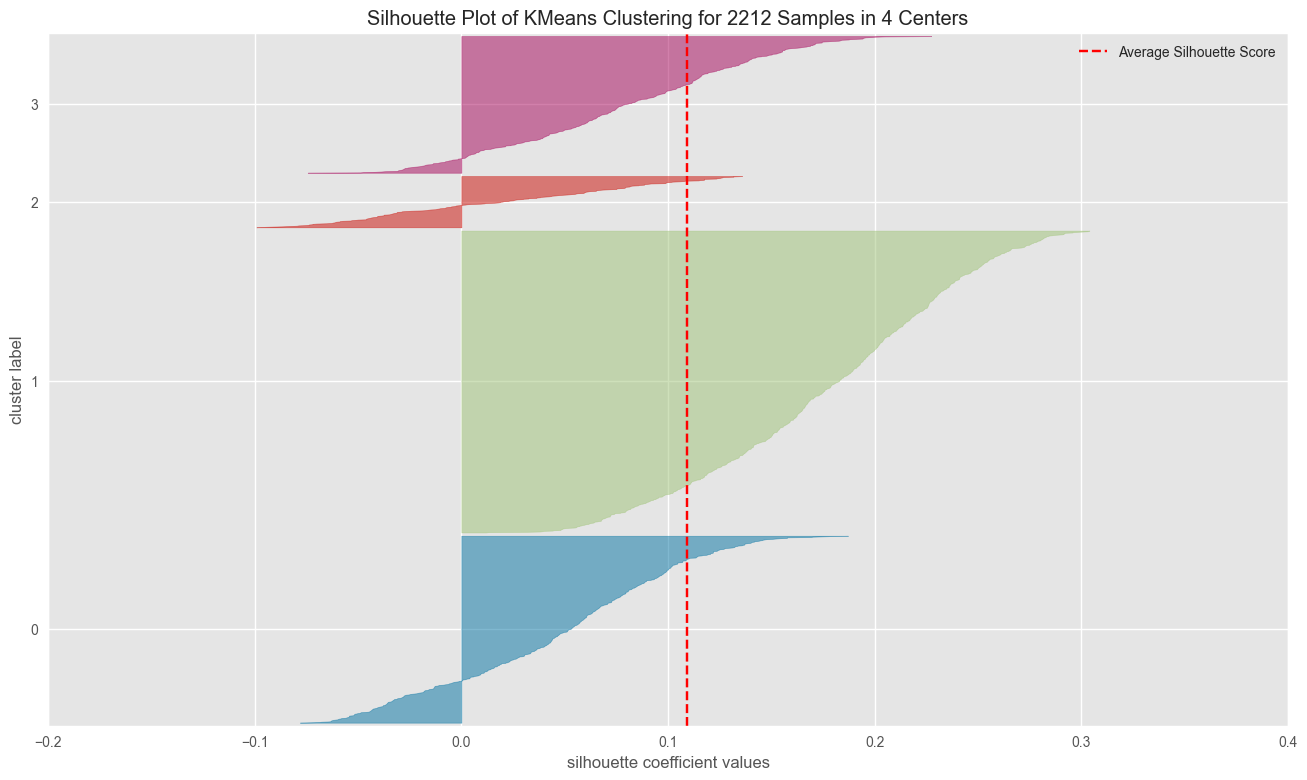

----------------------------------------------------------------------
For n_clusters = 5 The average silhouette_score is : 0.06132032848664491


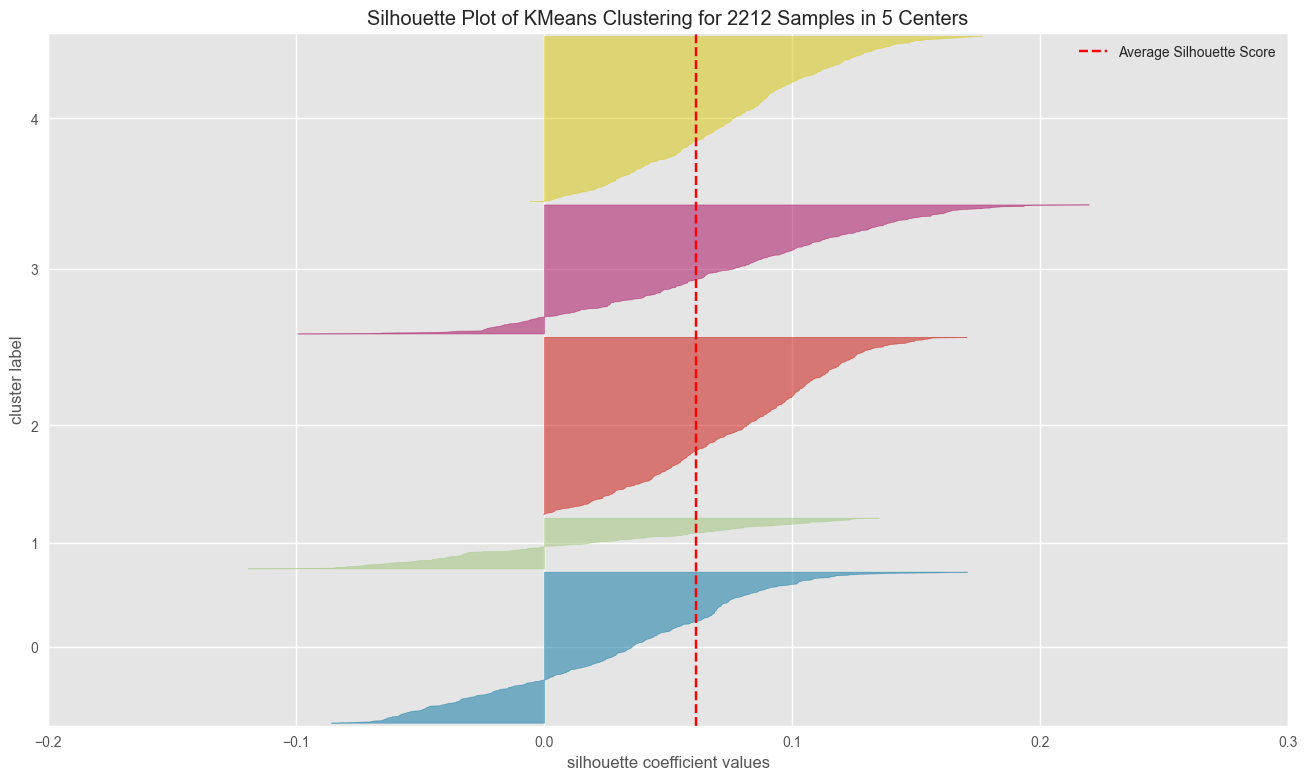

----------------------------------------------------------------------
For n_clusters = 6 The average silhouette_score is : 0.1281298428573377


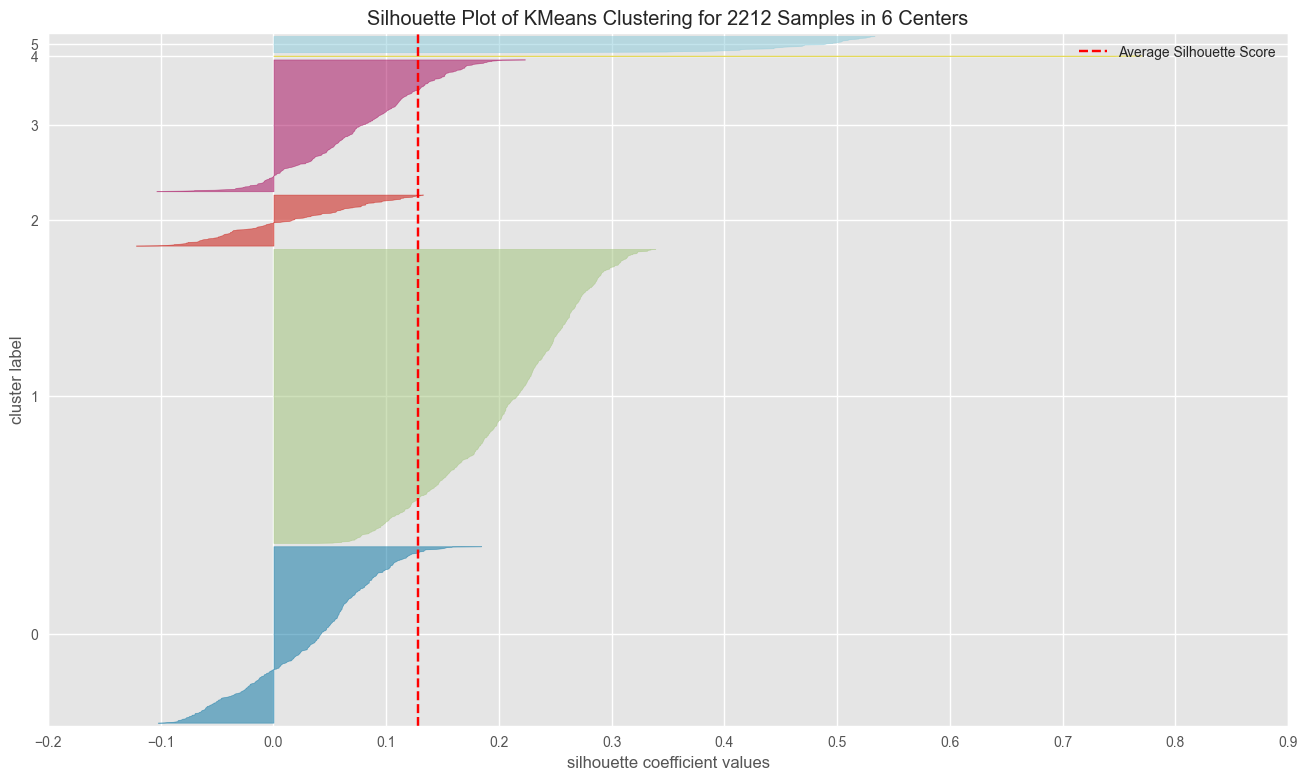

----------------------------------------------------------------------
For n_clusters = 7 The average silhouette_score is : 0.06541780620436037


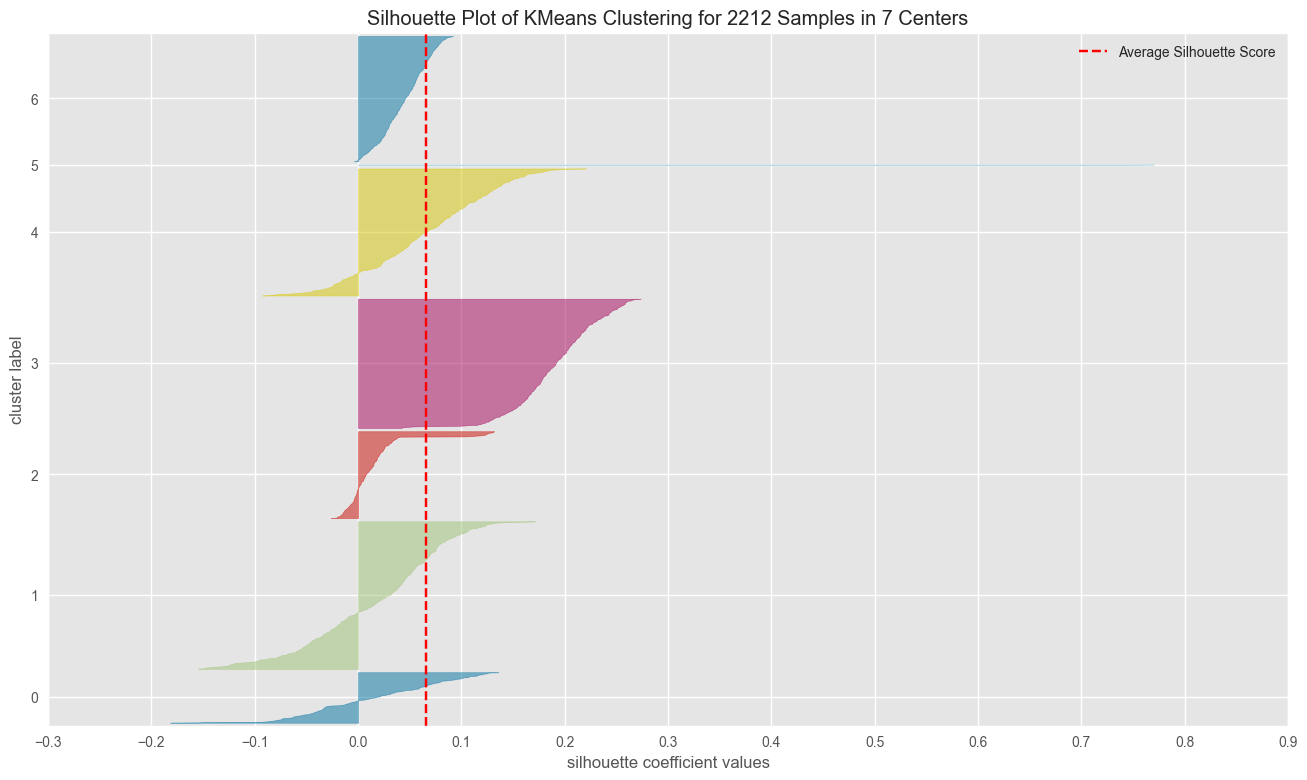

In [49]:
search_name = 'kmeans'

n_clusters = np.arange(2,8,1).tolist()
scores = {}

for n_clusters in n_clusters:
    
    print('-'*70)
    
    model = KMeans()

    param_dict = {'n_clusters': n_clusters,
                  'n_init': 10,
                  'random_state':42,
                 'algorithm':'auto'
                 }

    model.set_params(**param_dict)
    labels = model.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.poof()
    
    scores[n_clusters] = round(silhouette_avg,2)

In [50]:
# Average silhouette score for every number of clusters
scores

{2: 0.17, 3: 0.11, 4: 0.11, 5: 0.06, 6: 0.13, 7: 0.07}

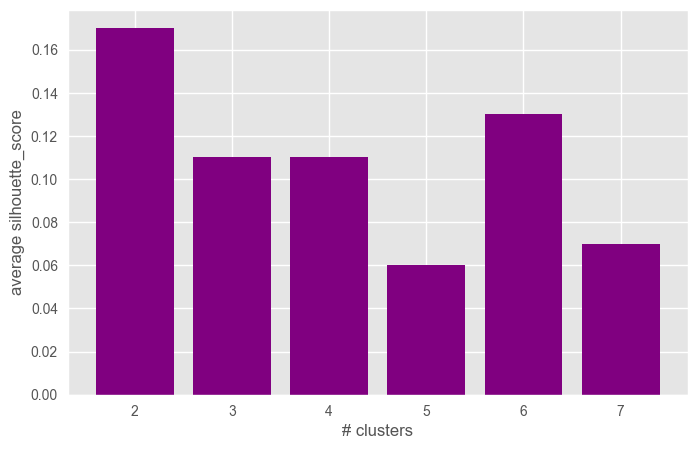

In [51]:
# Plotting the average silhouette_score for every number of clusters
plt.figure(figsize=(8,5))
plt.bar(range(len(scores)), list(scores.values()), tick_label=list(scores.keys()), color = 'purple')
plt.xlabel('# clusters')
plt.ylabel('average silhouette_score')
plt.show()

Examining the elbow technique and the silhouette score we decided that the best separation of our data is in two clusters.

# Plotting the clusters (# of clusters = 2)

In [52]:
'''agglomerative cluster data with n=2'''
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)

array([1, 0, 1, ..., 0, 1, 1])

In [53]:
'''attribute clusters to players'''
y = cluster.labels_
y_df = pd.DataFrame(y)
y_df.rename({0: 'cluster'}, axis=1, inplace=True)
y_df

,cluster
0,1
1,0
2,1
3,0
4,0
...,...
2207,0
2208,1
2209,0
2210,1


In [54]:
'''link player db with y data'''
cluster_df = pd.concat([PCA_df, y_df], axis=1)

In [55]:
cluster_df

,PC1,PC2,PC3,cluster
0,3.835539,-0.634376,-0.478557,1
1,-2.365996,-0.597329,-0.277415,0
2,1.700595,-0.357752,-1.374129,1
3,-2.614030,-1.710539,-0.070559,0
4,-0.464304,0.200952,-0.088287,0
...,...,...,...,...
2207,2.408725,0.615011,-2.013643,0
2208,-0.934973,2.951711,1.233796,1
2209,1.484083,0.008363,0.585783,0
2210,1.743991,1.304227,-1.022681,1


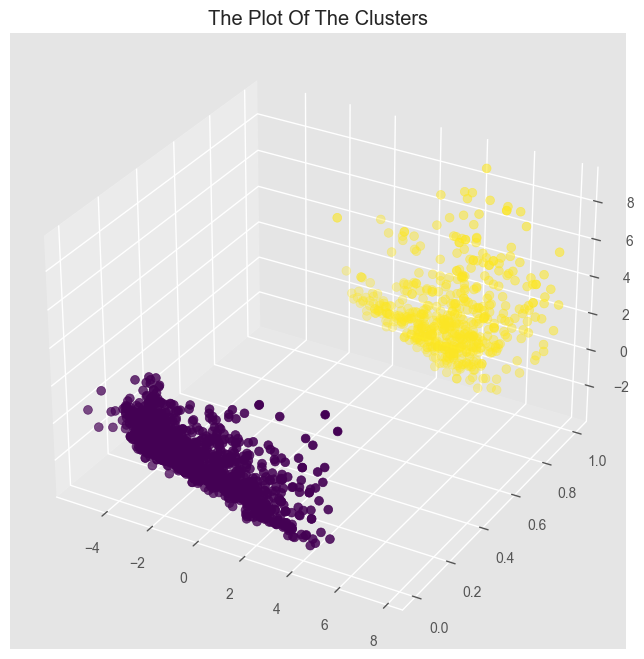

In [56]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=cluster_df["cluster"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

# Let's see some insights about the 2 - cluster distribution.

In [57]:
# agglomerative cluster data with n=2
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([1, 0, 1, ..., 0, 1, 0])

In [58]:
y = cluster.labels_
y_df = pd.DataFrame(y)
y_df.rename({0: 'cluster'}, axis=1, inplace=True)
y_df

,cluster
0,1
1,0
2,1
3,0
4,1
...,...
2207,1
2208,1
2209,0
2210,1


In [59]:
# Reset index to df and drop the previous index, so we can concat it to new_ df. (We created a new df1 to keep df clear)
df2 = df.reset_index() 
df2.drop('ID', axis=1, inplace=True)

In [60]:
#link customer db with y(cluster) data
cluster_df = pd.concat([df2, y_df], axis=1)

In [61]:
cluster_df.shape

(2212, 40)

In [62]:
cluster_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumDaysInCompany,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,cluster
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,57,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,60,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,49,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,30,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,33,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [63]:
cluster_size= cluster_df.groupby('cluster').size()
cluster_size

cluster
0    1300
1     912
dtype: int64

<AxesSubplot: xlabel='cluster'>

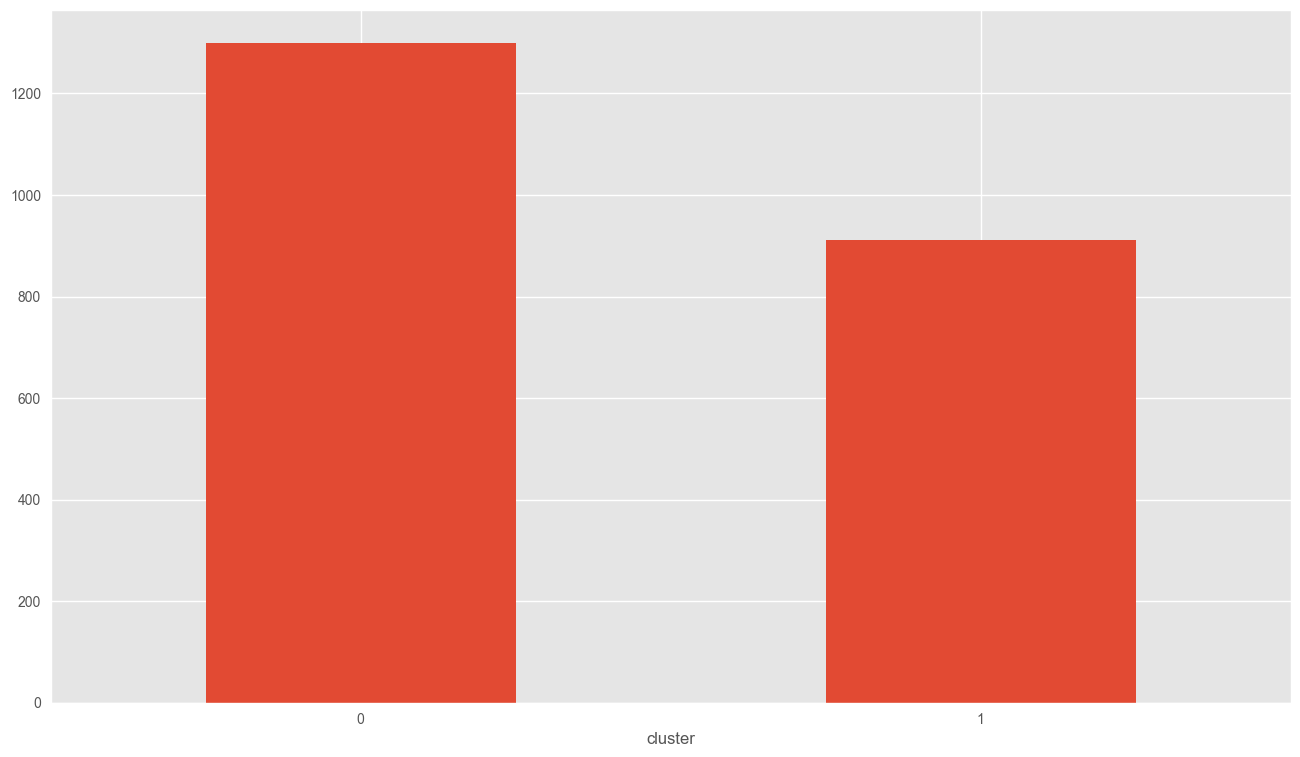

In [64]:
cluster_size.plot.bar(rot = 0)

#### The bigger ammount of observations (1300  customers) belongs to cluster 0.
#### The cluster 1 includes 912 customers.

In [65]:
# The mean values corresponding each cluster.
group_df = cluster_df.groupby('cluster').mean()
group_df = group_df.reset_index()
group_df

,cluster,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,NumDaysInCompany,Age,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,37160.663077,0.672308,0.526154,48.922308,113.663846,8.396154,44.219231,12.748462,8.745385,26.654615,2.562308,3.070000,1.081538,4.050769,6.509231,0.082308,0.033846,0.000769,0.005385,0.007692,0.010000,3.0,11.0,0.115385,514.750000,43.662308,0.097692,0.041538,0.490769,0.167692,0.202308,0.000000,0.001538,0.100000,0.387692,0.218462,0.260769,0.03000,0.001538
1,1,73052.661184,0.112939,0.476974,49.157895,578.435307,51.892544,342.088816,73.142544,53.133772,68.544956,1.985746,5.539474,4.939693,8.309211,3.628289,0.061404,0.131579,0.175439,0.148026,0.021930,0.007675,3.0,11.0,0.200658,508.429825,47.116228,0.077851,0.000000,0.523026,0.161184,0.237939,0.002193,0.001096,0.110746,0.387061,0.203947,0.254386,0.04057,0.000000


In [66]:
group_df.shape

(2, 40)

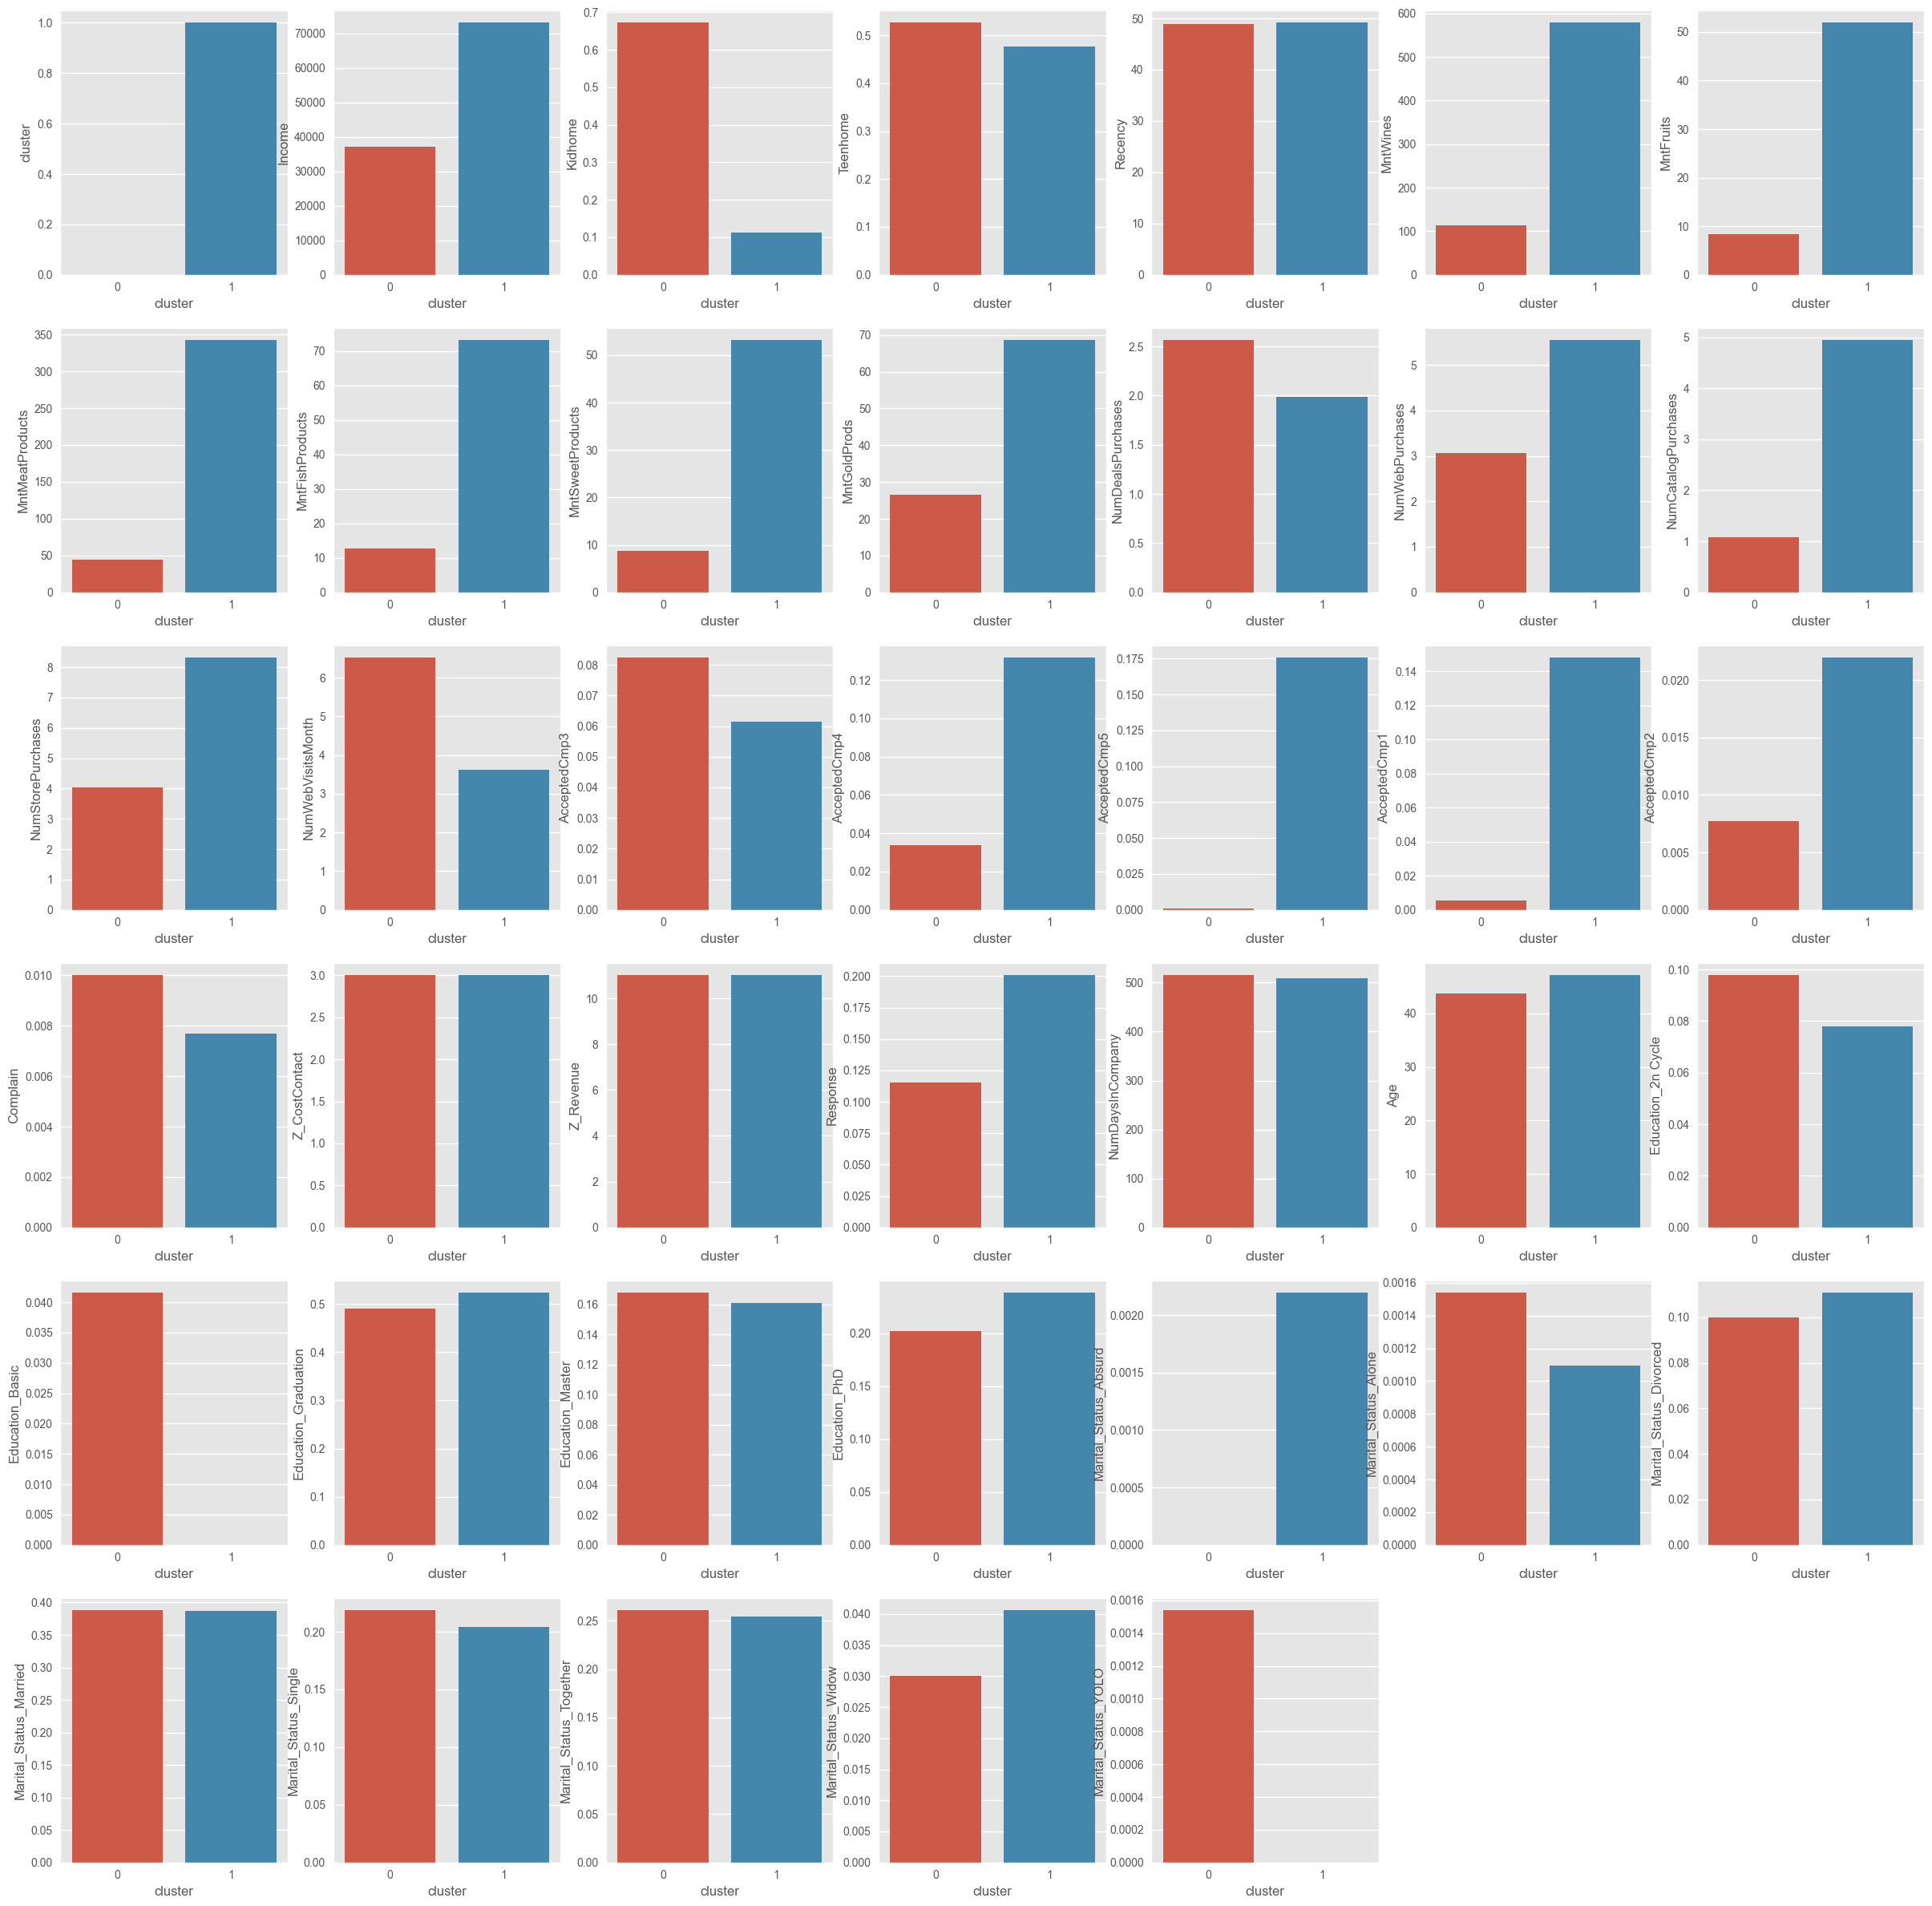

In [67]:
# Bar Plots 
# Cluster's distribition (means)
columns = list(group_df)


plt.figure(figsize = (30,30))

for i, column in enumerate(columns):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(6, 7, i+1) # nrows, ncols, axes position
    # plot the continent on these axes
    sns.barplot(x = group_df['cluster'], y = group_df[column], ax=ax)

plt.show()

# Conclusion

The cluster 0 includes customers with:
- Low income
- High number of children 
- Low ammount spending on wines, fruits, meat products, fish products, sweet products, gold products
- High number of deal purchases
- Low number of catalog and store purchases
- High number of web visits/Month
- Average age: 40

The cluster 1 includes customers with :
- High income
- Low number of children
- High ammount spending on wines, fruits, meat products, fish products, sweet products, gold products
- Low number of deal purchases
- High number of catalog and store purchases
- Low number of web visits/Month
- Average age: 45



So, cluster 0 includes customers with low income ,so , low spending who are mainly young but have a big family to take care of. As a result, their low income doesn't allow them to satisfy the needs of a big family. They prefer the deal purchases because of their economic problems.

Cluster 1 includes customers with high income and high spending who are round 45 years old and have 0 or 1 kid. They don't need deal purchases and they spend a lot of money to several products.


### The information above can be used in planning better marketing strategies.